In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## EDA ( Exploratory Data Analysis ) 

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5459335,379,TRANSFER,1864159.44,C1278080886,0.0,0.0,C112683203,8608930.13,10473089.56,0,0
6145909,546,CASH_OUT,66657.50,C1760108963,20943.0,0.0,C126997955,373938.99,440596.50,0,0
806905,40,CASH_OUT,95819.25,C1082397202,0.0,0.0,C481013135,5598968.94,5694788.19,0,0
1416266,139,CASH_OUT,47125.10,C1507254840,20439.0,0.0,C971006950,18559.29,65684.39,0,0
786582,39,CASH_OUT,166040.79,C1472647237,40229.0,0.0,C1304611574,108582.70,274623.49,0,0


/home/rahul/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

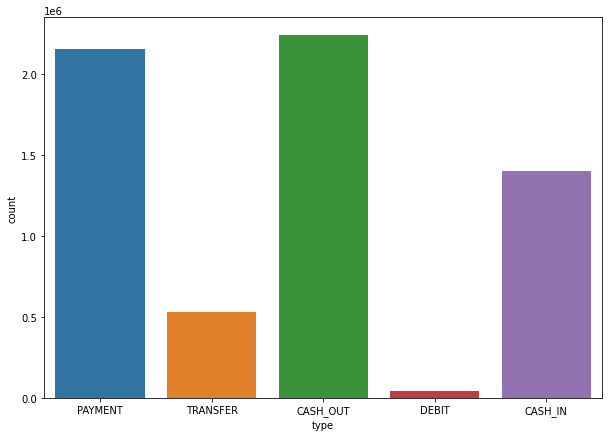

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(df['type'])




/home/rahul/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step'>

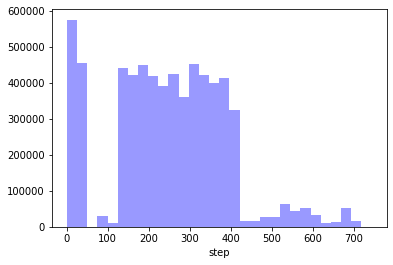

In [7]:
sns.distplot(df['step'], kde=False, color='blue', bins=30)

/home/rahul/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

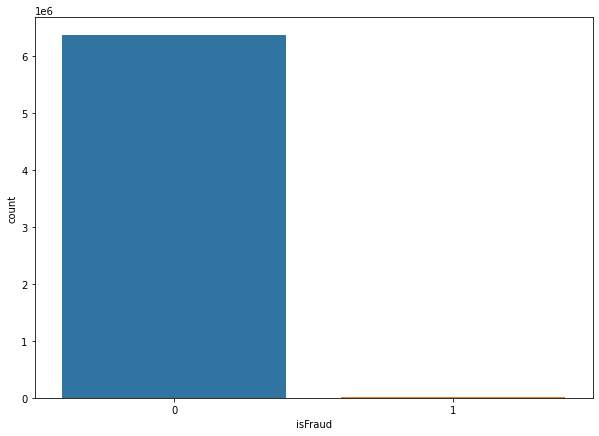

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(df['isFraud'])

/home/rahul/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount'>

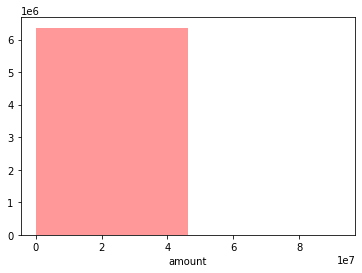

In [9]:


sns.distplot(df['amount'], kde=False, color='red', bins=2)



In [10]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
(df['amount'] >= 200.000).value_counts()


True     6334310
False      28310
Name: amount, dtype: int64

/home/rahul/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

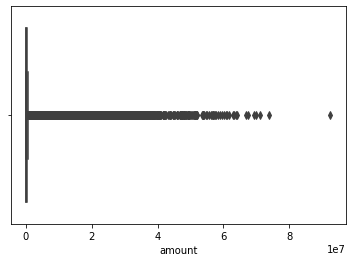

In [13]:
sns.boxplot(df['amount'])

 ## Feature Engineering

In [14]:
df = pd.get_dummies(df,columns=['type'])

## Detecting Multicollinearity using VIF

In [15]:
a = df.drop(['nameOrig','nameDest'] , axis='columns')


In [16]:
a

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [18]:
X = a
calc_vif(X)

,variables,VIF
0,step,1.003449
1,amount,4.075424
2,oldbalanceOrg,669.074960
3,newbalanceOrig,688.656352
4,oldbalanceDest,68.603157
5,newbalanceDest,79.000140
6,isFraud,1.226090
7,isFlaggedFraud,1.002819
8,type_CASH_IN,2.818880
9,type_CASH_OUT,2.096413


## Fixing Multicollinearity

In [19]:
a = df.drop(['oldbalanceOrg','oldbalanceDest','type_CASH_IN','nameOrig','nameDest'], axis=1)
X = a


In [20]:
X.dtypes

step                int64
amount            float64
newbalanceOrig    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

In [21]:
calc_vif(X)

,variables,VIF
0,step,2.755451
1,amount,1.545555
2,newbalanceOrig,1.153196
3,newbalanceDest,1.448195
4,isFraud,1.012632
5,isFlaggedFraud,1.002077
6,type_CASH_OUT,1.737213
7,type_DEBIT,1.014520
8,type_PAYMENT,1.692003
9,type_TRANSFER,1.371056


 ##  Training Model

In [22]:
X = X.drop(['isFraud'], axis=1) 

In [23]:
X

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,160296.36,0.00,0,0,0,1,0
1,1,1864.28,19384.72,0.00,0,0,0,1,0
2,1,181.00,0.00,0.00,0,0,0,0,1
3,1,181.00,0.00,0.00,0,1,0,0,0
4,1,11668.14,29885.86,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,0.00,6379898.11,0,1,0,0,0
6362618,743,850002.52,0.00,0.00,0,0,0,0,1


In [24]:
y = df['isFraud']
print(y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


## Splitting dataset into Training and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

 ## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##  Training Model using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/home/rahul/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Making confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1270837      40]
 [   1528     119]]


0.9987678032005683

## Answers for the Questions 